In [1]:
from arquivos import central
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd

In [2]:
robot = central.Central()

In [3]:
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_H1_66k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [4]:
%%time

robot.pct_data()
robot.balance_signal4()
robot.normal_data_to_array()
tot, sell, buy, all_f = robot.back_tpsl(10, 2)
tot = pd.Series(tot)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\johnk\Google Drive\My_Project\Git\Python\EA\arquivos\backtest.py (52)[0m
[1m
File "arquivos\backtest.py", line 52:[0m
[1m    def otimizado_tpsl(self, tpsl, multiply_tpsl, balance=1000):
        <source elided>

[1m        series = self.get_numpy_normal_data()
[0m        [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'arquivos.central.Central'>[0m


In [5]:
x = [1,1,1,1,0]

In [11]:
if not 3 in x:
    print('a')
elif not 4 in x:
    print(1)

a


In [7]:
results

,1_1,1_2,1_3,1_4,2_1,2_2,2_3,2_4,4_1,4_2,4_3,4_4,7_1,7_2,7_3,7_4
0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
1,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50,996.50
2,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16,996.16
3,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09,996.09
4,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49,996.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881674,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43,7169.43
881675,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51,7167.51
881676,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37,7166.37
881677,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06,7166.06


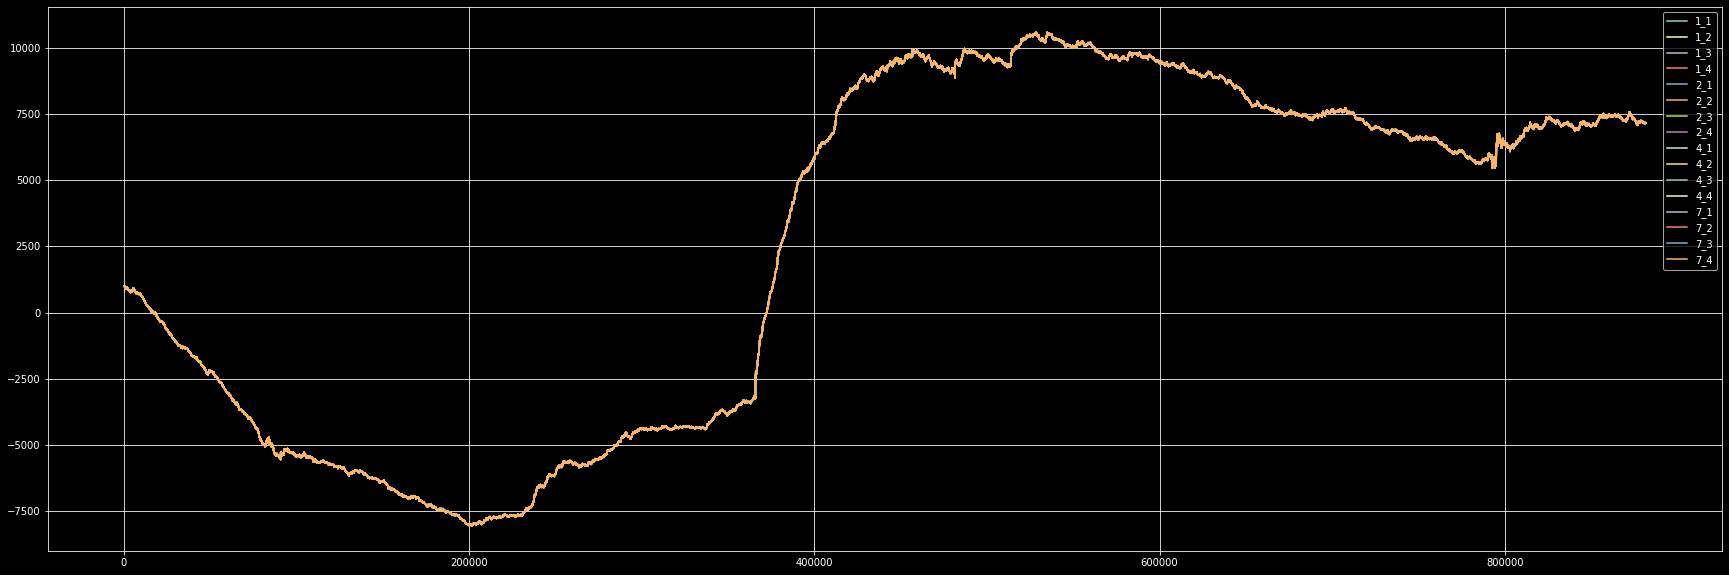

In [64]:
results.plot()
plt.grid()

In [9]:
one = results['1_1']

In [67]:
(one < 0).sum()

355111

In [62]:
# x = one.cummax() + one.cummin() Solução para caso a curva de capital seja menor que 0
x = one[400_000:].cummax() - one[400_000:].cummin()  # Caso a curva de capital seja maior que 0

In [63]:
x

400000       0.00
400001       2.67
400002       2.67
400003       3.69
400004       5.39
           ...   
881674    5158.91
881675    5158.91
881676    5158.91
881677    5158.91
881678    5158.91
Name: 1_1, Length: 481679, dtype: float64

In [38]:
one.cummin()

0         1000.00
1          996.50
2          996.16
3          996.09
4          996.09
           ...   
881674   -8073.22
881675   -8073.22
881676   -8073.22
881677   -8073.22
881678   -8073.22
Name: 1_1, Length: 881679, dtype: float64

In [ ]:
eurusd = robot.get_normal_data()['EURUSD_Open']
eur = robot.get_normal_data()['eur']

In [ ]:
eurusd.diff()

In [ ]:
def count_all(series):
    high = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    geral = []
    count = 0

    for i, v in enumerate(series):

        if v < 0:
            if count < 0: count = 0
            high[count] += 1
            count += 1
        elif v > 0:
            if count > 0: count = 0
            low[abs(count)] += 1
            count -= 1
        else:
            count == 0

        geral.append(count)
        
    return geral, high, low

In [ ]:
g_eurusd, h_eurusd, l_eurusd = count_all(eurusd.diff())
g_eur, h_eur, l_eur = count_all(eur)

In [ ]:
plt.plot(g_eurusd[:500])
plt.plot(g_eur[:500])
plt.show()

In [ ]:
np.corrcoef(np.array(g_eurusd), np.array(g_eur))